In [ ]:
# Week 2: Forecasting Waste and Energy Demand  

In this notebook, we:  
- Load the simulated dataset from Week 1  
- Train a simple AI model (Linear Regression)  
- Forecast Waste and Energy Demand for the next 7 days  
- Visualize the predictions  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [3]:
data = pd.read_csv(r"C:\Users\91735\OneDrive\Desktop\AI-Green-Energy-Grid\data\simulated_data.csv")
data["date"] = pd.to_datetime(data["date"])
data.head()


,date,waste,co2,energy_demand
0,2025-01-01,57,306,285
1,2025-01-02,136,499,205
2,2025-01-03,56,349,174
3,2025-01-04,140,481,158
4,2025-01-05,120,364,175


In [4]:
# Convert date to numeric for regression
data["day_num"] = np.arange(len(data))

X = data[["day_num"]]
y_waste = data["waste"]
y_energy = data["energy_demand"]


In [5]:
# Train linear regression for both
model_waste = LinearRegression().fit(X, y_waste)
model_energy = LinearRegression().fit(X, y_energy)


In [6]:
future_days = np.arange(len(data), len(data)+7).reshape(-1,1)

waste_forecast = model_waste.predict(future_days)
energy_forecast = model_energy.predict(future_days)

forecast_dates = pd.date_range(start=data["date"].iloc[-1] + pd.Timedelta(days=1), periods=7)
forecast_df = pd.DataFrame({
    "date": forecast_dates,
    "waste_forecast": waste_forecast,
    "energy_forecast": energy_forecast
})
forecast_df


C:\Users\91735\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\91735\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,date,waste_forecast,energy_forecast
0,2025-01-31,107.255172,181.381609
1,2025-02-01,107.910345,180.352466
2,2025-02-02,108.565517,179.323322
3,2025-02-03,109.220690,178.294179
4,2025-02-04,109.875862,177.265035
5,2025-02-05,110.531034,176.235892
6,2025-02-06,111.186207,175.206748


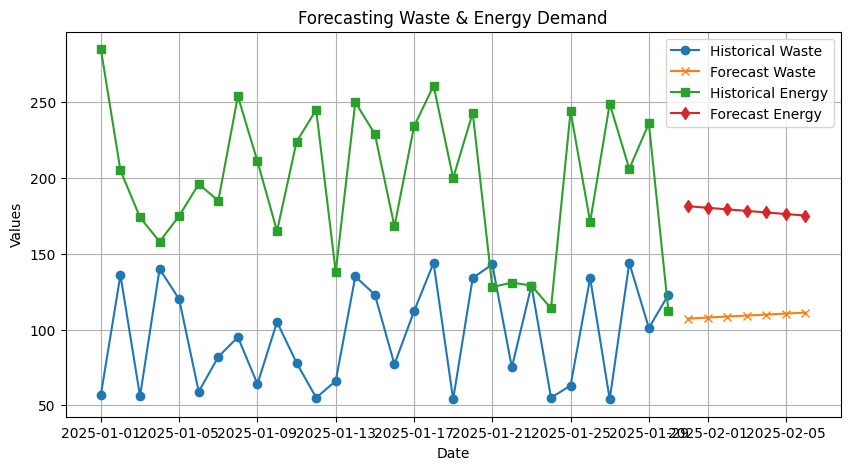

In [7]:
import os
plt.figure(figsize=(10,5))

# Waste
plt.plot(data["date"], data["waste"], label="Historical Waste", marker="o")
plt.plot(forecast_df["date"], forecast_df["waste_forecast"], label="Forecast Waste", marker="x")

# Energy
plt.plot(data["date"], data["energy_demand"], label="Historical Energy", marker="s")
plt.plot(forecast_df["date"], forecast_df["energy_forecast"], label="Forecast Energy", marker="d")

plt.title("Forecasting Waste & Energy Demand")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid(True)

# Save the chart
os.makedirs("outputs", exist_ok=True)
plt.savefig("outputs/forecast_plot.png")

plt.show()
